Loan Default Detection

In [218]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt



In [219]:
pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [220]:
!pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [221]:
df = pd.read_csv('C:/Users/khush/OneDrive/Desktop/data analytics fina;/Loan_default.csv')


In [222]:
Head  = df.head()
print(Head)

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time    

In [223]:
df.shape

(255347, 18)

In [224]:
df.head(15)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [225]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [226]:

df['LoanAmount'].unique()

array([ 50587, 124440, 129188, ..., 105905, 168231, 208294], dtype=int64)

In [227]:
print(df['LoanAmount'].value_counts(normalize=True)*100)

LoanAmount
133724    0.003133
221949    0.003133
95419     0.003133
235258    0.002741
108323    0.002741
            ...   
121259    0.000392
147115    0.000392
166792    0.000392
39044     0.000392
208294    0.000392
Name: proportion, Length: 158729, dtype: float64


In [228]:
df['LoanAmount'].describe()

count    255347.000000
mean     127578.865512
std       70840.706142
min        5000.000000
25%       66156.000000
50%      127556.000000
75%      188985.000000
max      249999.000000
Name: LoanAmount, dtype: float64

In [229]:
df['Default'].describe()

count    255347.000000
mean          0.116128
std           0.320379
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Default, dtype: float64

In [230]:
df['Age'].describe()

count    255347.000000
mean         43.498306
std          14.990258
min          18.000000
25%          31.000000
50%          43.000000
75%          56.000000
max          69.000000
Name: Age, dtype: float64

In [231]:
df['MonthsEmployed'].describe()

count    255347.000000
mean         59.541976
std          34.643376
min           0.000000
25%          30.000000
50%          60.000000
75%          90.000000
max         119.000000
Name: MonthsEmployed, dtype: float64

In [232]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [233]:
m = LabelEncoder()
df = df.apply(m.fit_transform) 
df.head(4) 

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,128027,38,60221,29657,220,80,3,1323,2,34,0,0,0,1,1,4,1,0
1,125442,51,30083,77402,158,15,0,281,4,58,2,0,1,0,0,4,1,0
2,85333,28,58702,80425,151,26,2,1917,1,21,2,3,0,1,1,0,0,1
3,220129,14,14248,25896,443,0,2,507,1,13,1,0,1,0,0,1,0,0


Since there is no null value, 
we can identify the credit score ranges with highest default value

In [234]:
df['CreditScore'].describe()

count    255347.000000
mean        274.264346
std         158.903867
min           0.000000
25%         137.000000
50%         274.000000
75%         412.000000
max         549.000000
Name: CreditScore, dtype: float64

Identify suitable credit score bins basis

Low Credit Scores (300 - 437):

This range includes the lowest 25% of the information (below the 25th percentile). This would likely contain high-risk borrowers, and thus would contain more default cases. Bin Name: "Very Poor" Below Average Credit Scores (437 - 574):

This range consists of credit scores from the 25th percentile through to the median. The borrowers in this range might still be at risk but not as much as borrowers in the "Very Poor" range. Bin Name: "Below Average" Average Credit Scores (574 - 712):

This range consists of scores from the median to the 75th percentile. Borrowers whose credit scores are in this range are more likely to have an average risk of default. Bin Name: "Average" High Credit Scores (712 - 849):

This range encompasses the top 25% of credit scores, including the very best credit scores. Borrowers within this group are low-risk and are likely to have lower default rates. Bin Name: "Good"

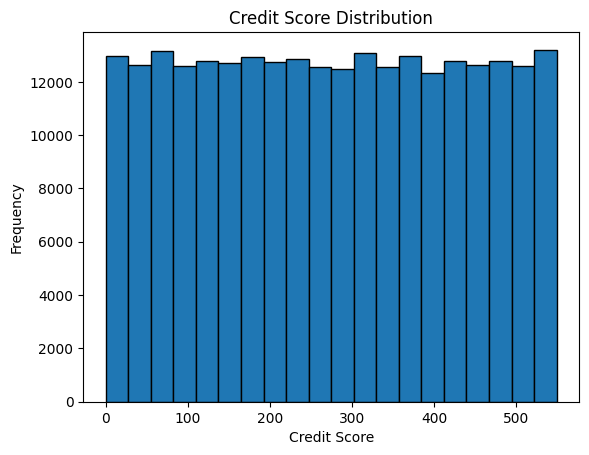

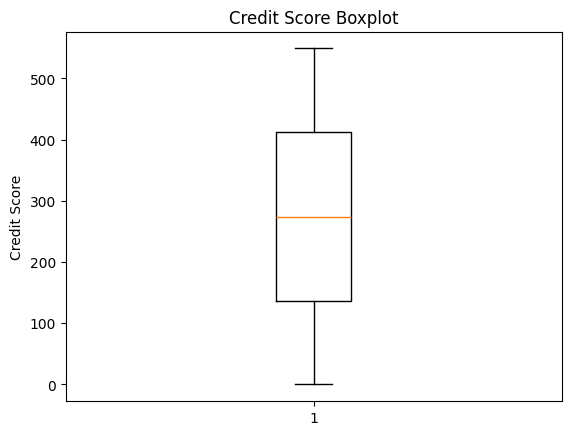

In [235]:
#plot representation
plt.hist(df['CreditScore'], bins=20, edgecolor='black')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

# Boxplot for visualizing quartiles and outliers
plt.boxplot(df['CreditScore'])
plt.title('Credit Score Boxplot')
plt.ylabel('Credit Score')
plt.show()


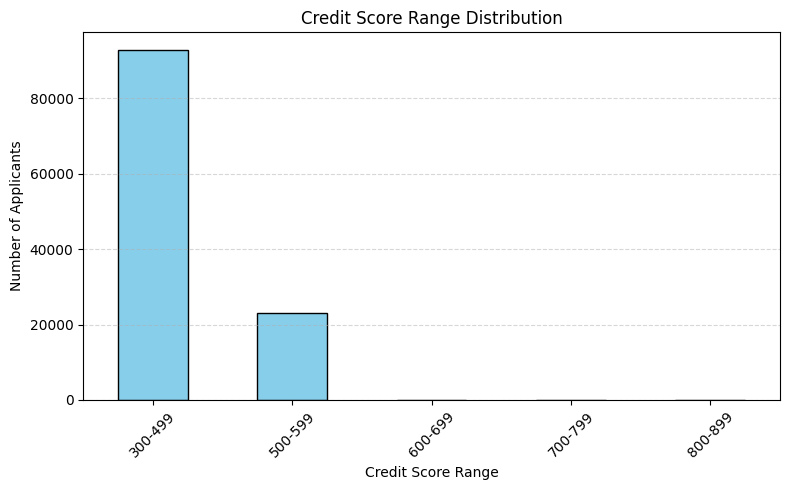

In [236]:

# Define bins and labels for grouping credit scores
bins = [300, 500, 600, 700, 800, 900]  # You can adjust these
labels = ['300-499', '500-599', '600-699', '700-799', '800-899']

# Create a new column with bin labels
df['CreditScoreRange'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, include_lowest=True)

# Count the number of entries in each bin
credit_score_counts = df['CreditScoreRange'].value_counts().sort_index()

# Plot bar graph
plt.figure(figsize=(8, 5))
credit_score_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Labels and title
plt.title('Credit Score Range Distribution')
plt.xlabel('Credit Score Range')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Identify the default rate in each of the credit score's categories.

In [237]:
bins = [300,437,574,712,849]
bin_labels = ['Very Poor', 'Below Average', 'Average', 'Good']

df['CreditScoreBin']  = pd.cut(df['CreditScore'], bins=bins, labels=bin_labels,right=True)

default_rate_by_bin = df.groupby('CreditScoreBin')['Default'].mean()*100

print(default_rate_by_bin)

CreditScoreBin
Very Poor        10.944495
Below Average    10.174591
Average                NaN
Good                   NaN
Name: Default, dtype: float64


C:\Users\khush\AppData\Local\Temp\ipykernel_26612\1871669783.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate_by_bin = df.groupby('CreditScoreBin')['Default'].mean()*100


Identify the default rate in each of the credit score's categories. Therefore, we may conclude taht the default rate falls as vcredit score rise, which is consistent with real-world situations.

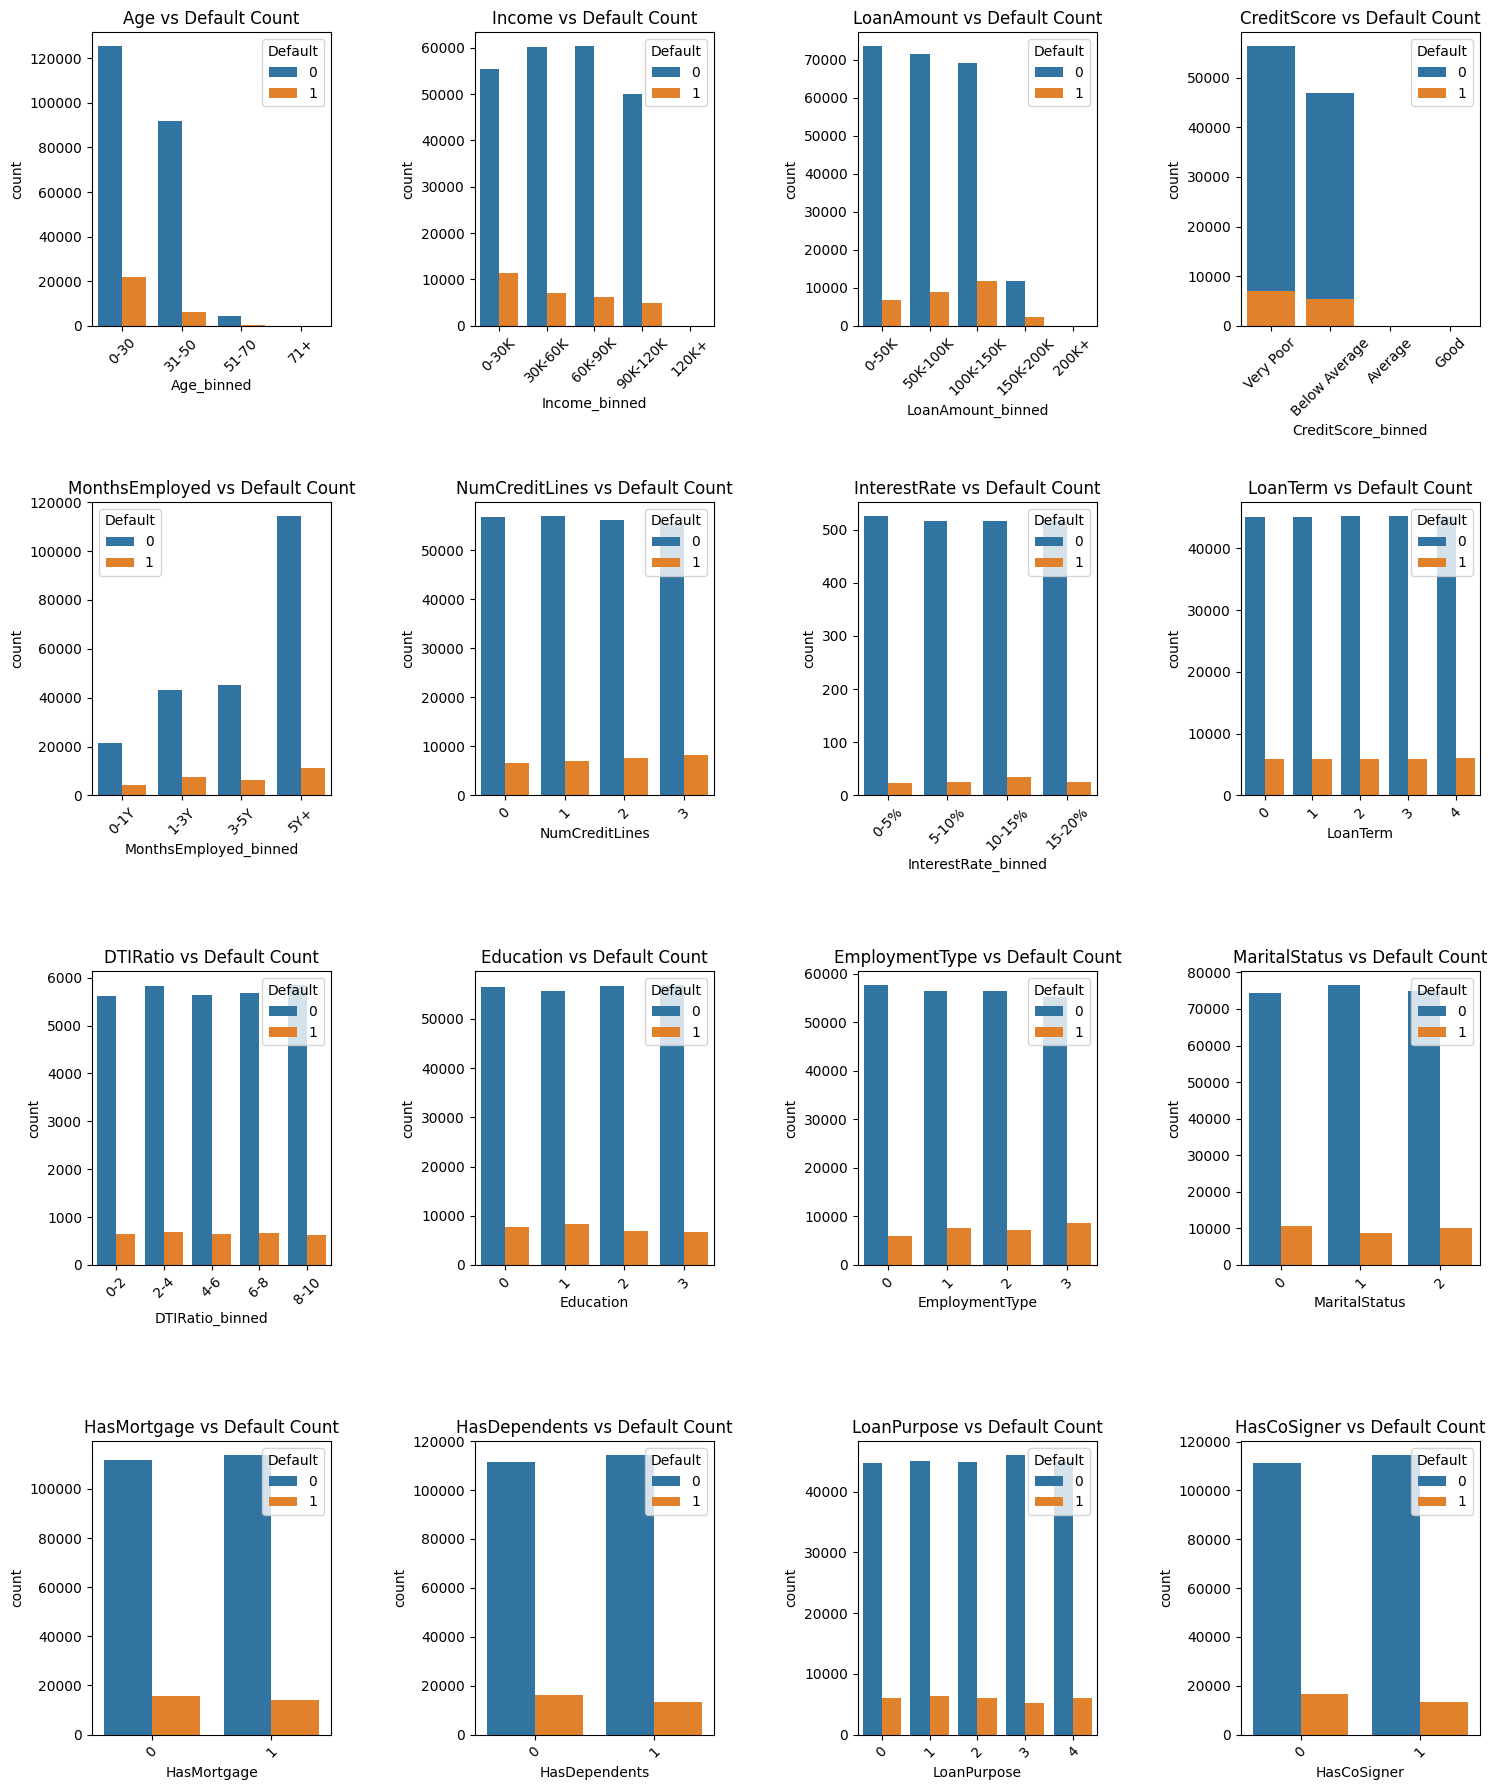

In [238]:
# Plotting setup
plt.figure(figsize=(15, 18))

# Define numerical columns to bin
numerical_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Create subplots for numerical features with more appropriate binning
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)  # Adjusted grid layout to 4x4
    # Bin the numerical features for clarity
    if feature == 'Age':
        bins = [0, 30, 50, 70, 100]
        labels = ['0-30', '31-50', '51-70', '71+']
        df[feature + '_binned'] = pd.cut(df[feature], bins=bins, labels=labels)
        sns.countplot(x=feature + '_binned', hue='Default', data=df)
    elif feature == 'Income':
        bins = [0, 30000, 60000, 90000, 120000, 150000]
        labels = ['0-30K', '30K-60K', '60K-90K', '90K-120K', '120K+']
        df[feature + '_binned'] = pd.cut(df[feature], bins=bins, labels=labels)
        sns.countplot(x=feature + '_binned', hue='Default', data=df)
    elif feature == 'LoanAmount':
        bins = [0, 50000, 100000, 150000, 200000, 250000]
        labels = ['0-50K', '50K-100K', '100K-150K', '150K-200K', '200K+']
        df[feature + '_binned'] = pd.cut(df[feature], bins=bins, labels=labels)
        sns.countplot(x=feature + '_binned', hue='Default', data=df)
    elif feature == 'CreditScore':
        bins = [300,437,574,712,849]
        labels = ['Very Poor', 'Below Average', 'Average', 'Good']
        df[feature + '_binned'] = pd.cut(df[feature], bins=bins, labels=labels)
        sns.countplot(x=feature + '_binned', hue='Default', data=df)
    elif feature == 'MonthsEmployed':
        bins = [0, 12, 36, 60, 120]
        labels = ['0-1Y', '1-3Y', '3-5Y', '5Y+']
        df[feature + '_binned'] = pd.cut(df[feature], bins=bins, labels=labels)
        sns.countplot(x=feature + '_binned', hue='Default', data=df)
    elif feature == 'DTIRatio':
        bins = [0, 2, 4, 6, 8, 10]
        labels = ['0-2', '2-4', '4-6', '6-8', '8-10']
        df[feature + '_binned'] = pd.cut(df[feature], bins=bins, labels=labels)
        sns.countplot(x=feature + '_binned', hue='Default', data=df)
    elif feature == 'InterestRate':
        bins = [0, 5, 10, 15, 20]
        labels = ['0-5%', '5-10%', '10-15%', '15-20%']
        df[feature + '_binned'] = pd.cut(df[feature], bins=bins, labels=labels)
        sns.countplot(x=feature + '_binned', hue='Default', data=df)
    else:
        sns.countplot(x=feature, hue='Default', data=df)
    plt.title(f'{feature} vs Default Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Create subplots for categorical features
categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

for i, feature in enumerate(categorical_features, len(numerical_features) + 1):
    plt.subplot(4, 4, i)  # Continue the grid layout with the same adjusted size (4x4)
    sns.countplot(x=feature, hue='Default', data=df)
    plt.title(f'{feature} vs Default Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout to add space between plots
plt.tight_layout()
plt.subplots_adjust(hspace=0.6, wspace=0.6) 


plt.show()

Interpretation

As loan amount increases, the cases for default increases.

As credit score improves, count for default decreases.

In employment type, unemployed people have highest number of default cases.

As interest rate increases, count for default also increases.

As count of no. of credit lines increases, default count increases.


In [239]:
# Drop all columns that end with '_binned' as created in above code
df = df.drop(columns=[col for col in df.columns if col.endswith('_binned')])

df = df.drop(columns =['CreditScoreBin','LoanID'])

Chi-square test

Chi-Square test is employed to determine if there exists a notable relationship between two categorical variables. It may be utilized in feature selection as well as unveil critical relationships among the predictors and target variable.

In [240]:
categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 
                        'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

chi_square_results = {}

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['Default'])

    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    chi_square_results[feature] = {'Chi-Square Statistic': chi2_stat,
                                   'P-value': p_value,
                                   'Degrees of Freedom': dof}

for feature, result in chi_square_results.items():
    print(f"Feature: {feature}")
    print(f"Chi-Square Statistic: {result['Chi-Square Statistic']}")
    print(f"P-value: {result['P-value']}")
    print(f"Degrees of Freedom: {result['Degrees of Freedom']}")
    print('-' * 40)

for feature, result in chi_square_results.items():
    if result['P-value'] < 0.05:
        print(f"Feature {feature} is significant (P-value < 0.05), indicating an association with Default.")
    else:
        print(f"Feature {feature} is not significant (P-value >= 0.05), no association with Default.")

Feature: Education
Chi-Square Statistic: 214.01898255592704
P-value: 3.9404864175508716e-46
Degrees of Freedom: 3
----------------------------------------
Feature: EmploymentType
Chi-Square Statistic: 529.7449284156027
P-value: 1.7066378020433154e-114
Degrees of Freedom: 3
----------------------------------------
Feature: MaritalStatus
Chi-Square Statistic: 200.3611356065489
P-value: 3.105504830442356e-44
Degrees of Freedom: 2
----------------------------------------
Feature: HasMortgage
Chi-Square Statistic: 133.25200560751577
P-value: 7.96338322455275e-31
Degrees of Freedom: 1
----------------------------------------
Feature: HasDependents
Chi-Square Statistic: 306.8506093007918
P-value: 1.0600086119645882e-68
Degrees of Freedom: 1
----------------------------------------
Feature: LoanPurpose
Chi-Square Statistic: 127.93422475687699
P-value: 1.0767865809403042e-26
Degrees of Freedom: 4
----------------------------------------
Feature: HasCoSigner
Chi-Square Statistic: 390.30504637148

Interpretation

Top variables like EmploymentType, HasCoSigner, and HasDependents are the strongest predictors of the target variable (Default) based on their Chi-Square statistics.

Lower-ranked variables, like LoanPurpose, while still statistically significant, have weaker associations compared to the top-ranked variables.

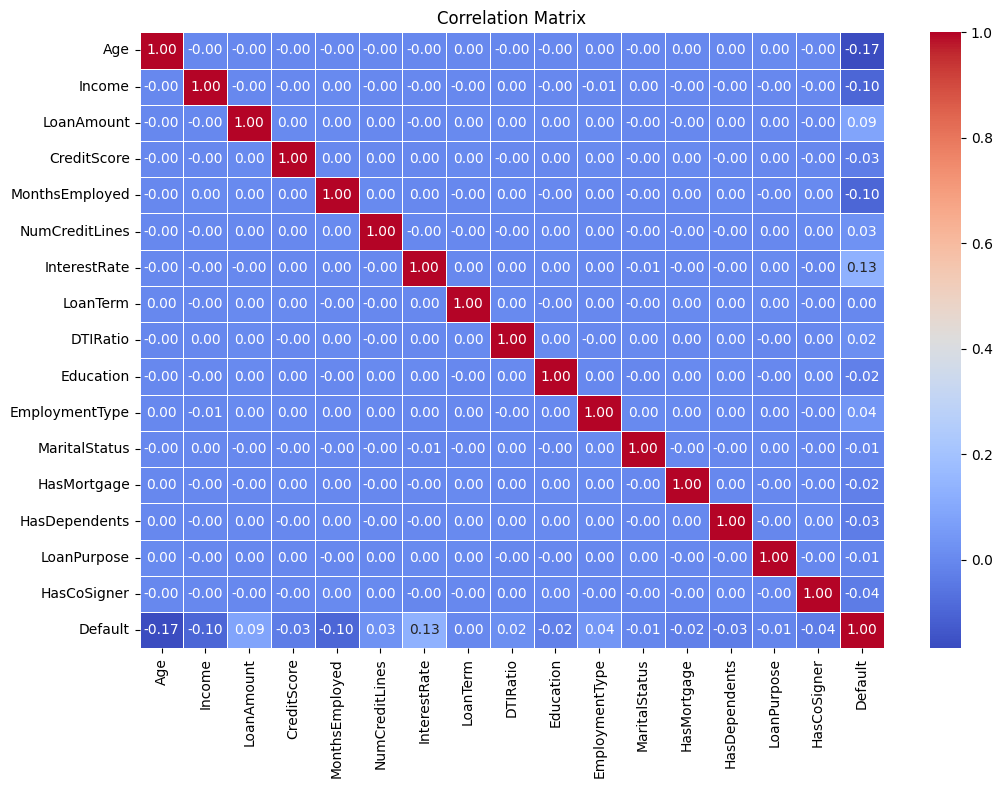

Top features contributing to Default:

Age               0.167783
InterestRate      0.131273
Income            0.099058
MonthsEmployed    0.097374
LoanAmount        0.086657
EmploymentType    0.041010
HasCoSigner       0.039109
HasDependents     0.034678
CreditScore       0.034166
NumCreditLines    0.028330
Name: Default, dtype: float64


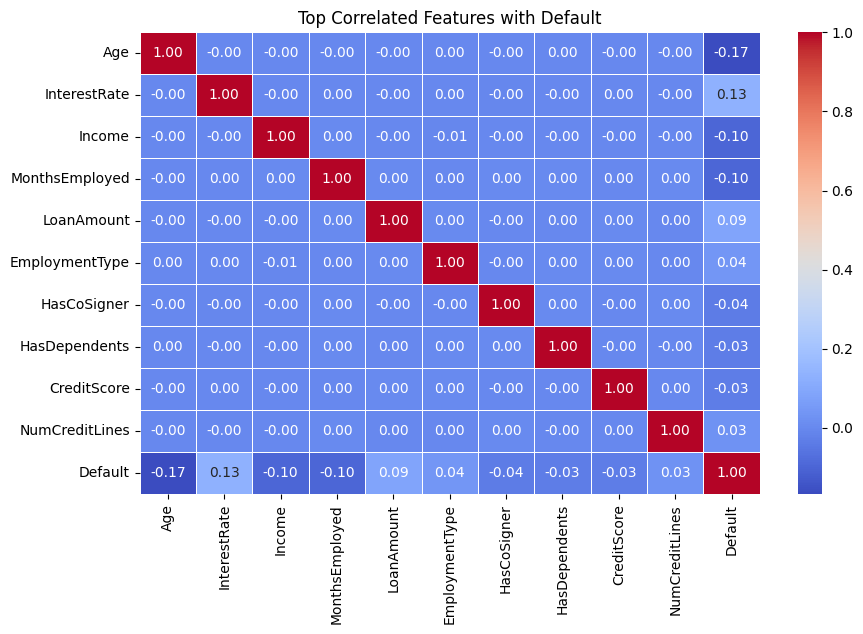

In [241]:
#Finding top features contributing to default
#finding correlation

# Encode categorical columns
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 
                       'HasDependents', 'LoanPurpose', 'HasCoSigner']

encoder = LabelEncoder()
for column in categorical_columns:
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':
        df[column] = encoder.fit_transform(df[column])

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# 1. Full correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# 2. Find top features most correlated with 'Default'
cor_target = correlation_matrix['Default'].abs().sort_values(ascending=False)
top_features = cor_target[1:11]  # Exclude 'Default' itself

print("Top features contributing to Default:\n")
print(top_features)

# 3. Focused heatmap for top features
selected_features = top_features.index.tolist() + ['Default']
top_corr_matrix = numeric_df[selected_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Top Correlated Features with Default")
plt.show()



Identify the defult rate in each of the credit score's categories. we shall utilize random forest  feature selection and logistic regression

In [242]:


# Include all numerical variables
X = df[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']]
X = add_constant(X)  # Add intercept for VIF calculation

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

          Feature        VIF
0           const  25.665932
1             Age   1.000031
2          Income   1.000022
3      LoanAmount   1.000029
4     CreditScore   1.000007
5  MonthsEmployed   1.000022
6  NumCreditLines   1.000008
7    InterestRate   1.000013
8        LoanTerm   1.000016
9        DTIRatio   1.000033



feature selection using random forest

In [243]:
#polynomial features -feature selection and pdp

X = df[['Income', 'InterestRate', 'LoanAmount', 'Age', 'CreditScore']]
y = df['Default']  # Assuming 'Default' is the target column

poly = PolynomialFeatures(degree=3, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)
poly_features = poly.get_feature_names_out(input_features=['Income', 'InterestRate', 'LoanAmount', 'Age', 'CreditScore'])
X_poly_df = pd.DataFrame(X_poly, columns=poly_features)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_poly_df, y)

feature_importances = pd.DataFrame({
    'Feature': poly_features,
    'Importance': rf.feature_importances_
})

important_features = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importance Ranking:")
print(important_features.head(10))  # Show top 10 important features

# Select only the most important features
selected_features = important_features[important_features['Importance'] > 0.01]['Feature']  # Threshold for importance
X_selected = X_poly_df[selected_features]



Feature Importance Ranking:
                                Feature  Importance
9               InterestRate LoanAmount    0.055324
7                            Income Age    0.051733
1                          InterestRate    0.049129
20               Income Age CreditScore    0.046286
2                            LoanAmount    0.044743
0                                Income    0.042408
5                   Income InterestRate    0.040239
22  InterestRate LoanAmount CreditScore    0.040228
18                Income LoanAmount Age    0.039815
16              Income InterestRate Age    0.039812


In [244]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Assume df is already loaded and contains 'Default' column

# Separate features and target
X = df.drop('Default', axis=1)
y = df['Default']

# Encode non-numeric (categorical) columns
X_encoded = pd.get_dummies(X, drop_first=True)

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['AnomalyScore'] = iso_forest.fit_predict(X_encoded)

# Convert anomaly score (-1 = anomaly, 1 = normal) into binary flag
df['Anomaly'] = df['AnomalyScore'].apply(lambda x: 1 if x == -1 else 0)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y, df['Anomaly']))
print("\nClassification Report:")
print(classification_report(y, df['Anomaly']))

# Extract anomalies
anomalies = df[df['Anomaly'] == 1]
print("\nSample Anomalies:")
print(anomalies.head())



Confusion Matrix:
[[203052  22642]
 [ 26760   2893]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89    225694
           1       0.11      0.10      0.10     29653

    accuracy                           0.81    255347
   macro avg       0.50      0.50      0.50    255347
weighted avg       0.79      0.81      0.80    255347


Sample Anomalies:
    Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
4    42    4654        2703          333               8               3   
8    18   22999       56653          527              83               0   
12   23    7068       38019          529              87               3   
17   21   15344        3849          511             106               1   
32   41   74078       32743          540               6               0   

    InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  \
4            451         3        63          0      

In [245]:
# Count of default and non-default cases out of total cases

default_count = df['Default'].sum()
non_default_count = len(df) - default_count

default_percentage = round(default_count/df['Default'].count()*100,2)
non_default_percentage = round(non_default_count/df['Default'].count()*100,2)


print(f"Total Default cases: {default_count}")
print(f"Total non_default cases: {non_default_count}")
print(f"Default percentage:{default_percentage}%")
print(f"Non Default percentage:{non_default_percentage}%")

Total Default cases: 29653
Total non_default cases: 225694
Default percentage:11.61%
Non Default percentage:88.39%


In [246]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd

# Separate features and label
X = df.drop("Default", axis=1)
y = df["Default"]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Handle missing values using mean imputation (now safe since all columns are numeric)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_imputed, y_train)

# Before resampling
print("Before Resampling:")
print(f"Default cases: {sum(y_train == 1)}")
print(f"Non-Default cases: {sum(y_train == 0)}")

# After resampling
print("\nAfter Resampling:")
print(f"Default cases: {sum(y_resampled == 1)}")
print(f"Non-Default cases: {sum(y_resampled == 0)}")


Before Resampling:
Default cases: 20729
Non-Default cases: 158013

After Resampling:
Default cases: 158013
Non-Default cases: 158013


In [247]:
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [248]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score

log_reg = LogisticRegression(max_iter=1000, random_state=42)

cv_scores = cross_val_score(log_reg, X_resampled,y_resampled, cv=5, scoring='roc_auc')

log_reg.fit(X_resampled, y_resampled)

y_pred = log_reg.predict(X_test)  
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]


print("\nLogistic Regression:")
print(f"Cross-validated AUC-ROC scores: {cv_scores}")
print(f"Mean AUC-ROC: {cv_scores.mean()}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"AUC-ROC on test set: {roc_auc_score(y_test, y_pred_proba)}")

C:\Users\khush\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\khush\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode


Logistic Regression:
Cross-validated AUC-ROC scores: [0.74205439 0.7570539  0.75474629 0.7585024  0.75971765]
Mean AUC-ROC: 0.7544149277819298
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     67681
           1       0.22      0.68      0.33      8924

    accuracy                           0.68     76605
   macro avg       0.58      0.68      0.56     76605
weighted avg       0.86      0.68      0.73     76605

AUC-ROC on test set: 0.7427941401826698


C:\Users\khush\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [249]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize Random Forest with pruning parameters
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# Train the Random Forest model
rf.fit(X_resampled, y_resampled)

# Evaluate on the test set
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

print("\nRandom Forest:")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"AUC-ROC on test set: {roc_auc_score(y_test, y_pred_proba_rf)}")


Random Forest:
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93     67681
           1       0.32      0.05      0.08      8924

    accuracy                           0.88     76605
   macro avg       0.61      0.52      0.51     76605
weighted avg       0.82      0.88      0.84     76605

AUC-ROC on test set: 0.7017396587258347


In [250]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd

# Step 1: Encode categorical variables
X = df.drop("Default", axis=1)
y = df["Default"]
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 2: Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Step 3: Apply SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X_imputed, y)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 5: Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Step 6: Predict probabilities
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Step 7: Adjust decision threshold
threshold = 0.4
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Step 8: Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred_adjusted))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba)}")


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     24938
           1       0.95      0.92      0.93     36068

    accuracy                           0.92     61006
   macro avg       0.92      0.92      0.92     61006
weighted avg       0.92      0.92      0.92     61006

AUC-ROC: 0.9748586820256012


In [254]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm.fit(X_train, y_train)

y_pred_proba = lgbm.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred_adjusted))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba)}")

[LightGBM] [Info] Number of positive: 144349, number of negative: 99675
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047969 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4843
[LightGBM] [Info] Number of data points in the train set: 244024, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     24938
           1       0.98      0.90      0.94     36068

    accuracy                           0.93     61006
   macro avg       0.93      0.94      0.93     61006
weighted avg       0.94      0.93      0.93     61006

AUC-ROC: 0.9736223298569185


In [255]:
pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [256]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm.fit(X_train, y_train)

y_pred_proba = lgbm.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred_adjusted))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba)}")

[LightGBM] [Info] Number of positive: 144349, number of negative: 99675
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4843
[LightGBM] [Info] Number of data points in the train set: 244024, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     24938
           1       0.98      0.90      0.94     36068

    accuracy                           0.93     61006
   macro avg       0.93      0.94      0.93     61006
weighted avg       0.94      0.93      0.93     61006

AUC-ROC: 0.9736223298569185


C:\Users\khush\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     24938
           1       0.98      0.90      0.94     36068

    accuracy                           0.93     61006
   macro avg       0.92      0.94      0.93     61006
weighted avg       0.94      0.93      0.93     61006

ROC AUC: 0.975127897978825

Logistic Regression:
              precision    recall  f1-score   support

           0       0.72      0.63      0.67     24938
           1       0.76      0.83      0.79     36068

    accuracy                           0.75     61006
   macro avg       0.74      0.73      0.73     61006
weighted avg       0.74      0.75      0.74     61006

ROC AUC: 0.8079585681239613


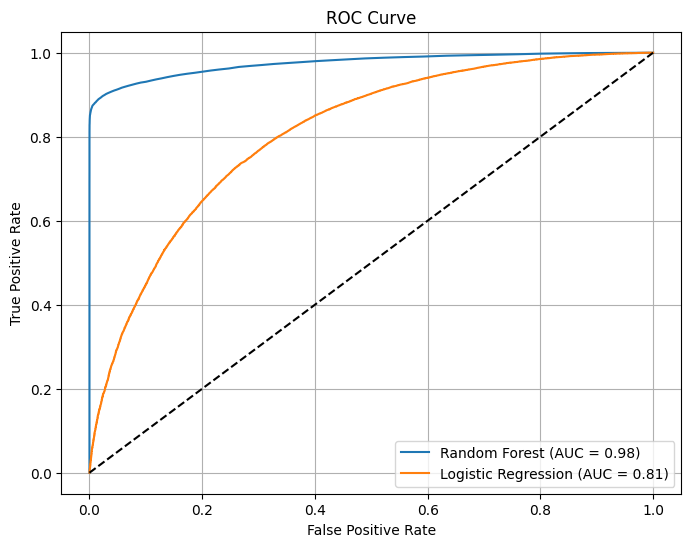

In [257]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

# Print classification metrics
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

print("\nLogistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))

# Plot ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = %0.2f)" % roc_auc_score(y_test, y_prob_rf))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression (AUC = %0.2f)" % roc_auc_score(y_test, y_prob_lr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


C:\Users\khush\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     24938
           1       0.98      0.90      0.94     36068

    accuracy                           0.93     61006
   macro avg       0.92      0.94      0.93     61006
weighted avg       0.94      0.93      0.93     61006

ROC AUC: 0.975127897978825

Logistic Regression:
              precision    recall  f1-score   support

           0       0.72      0.63      0.67     24938
           1       0.76      0.83      0.79     36068

    accuracy                           0.75     61006
   macro avg       0.74      0.73      0.73     61006
weighted avg       0.74      0.75      0.74     61006

ROC AUC: 0.8079585681239613


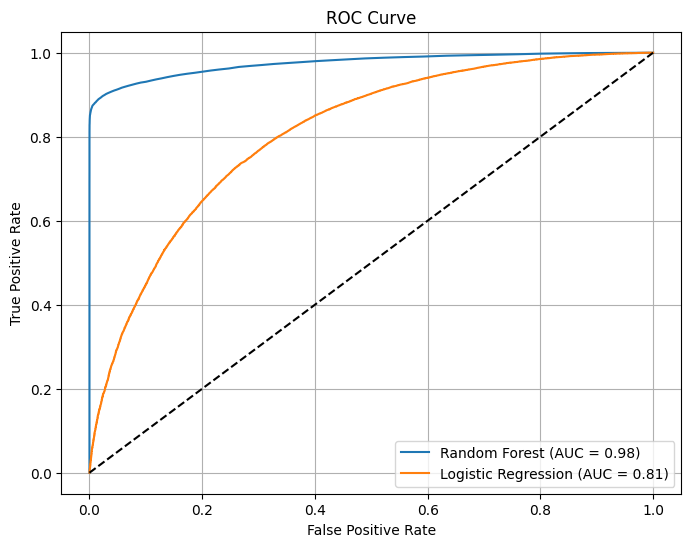

In [258]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

# Print classification metrics
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

print("\nLogistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))

# Plot ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = %0.2f)" % roc_auc_score(y_test, y_prob_rf))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression (AUC = %0.2f)" % roc_auc_score(y_test, y_prob_lr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


🔹 Random Forest Classifier Results
Accuracy: 0.9287084556231452
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92     24757
           1       0.99      0.89      0.94     36232

    accuracy                           0.93     60989
   macro avg       0.92      0.94      0.93     60989
weighted avg       0.94      0.93      0.93     60989

ROC AUC Score: 0.9724898758257488


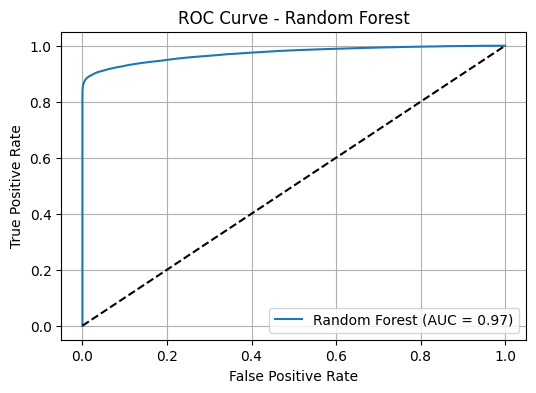

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("🔹 Random Forest Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_score(y_test, y_prob_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()


C:\Users\khush\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


🔹 Logistic Regression Results
Accuracy: 0.7470576664590368
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.63      0.67     24938
           1       0.76      0.83      0.79     36068

    accuracy                           0.75     61006
   macro avg       0.74      0.73      0.73     61006
weighted avg       0.74      0.75      0.74     61006

ROC AUC Score: 0.8079585681239613


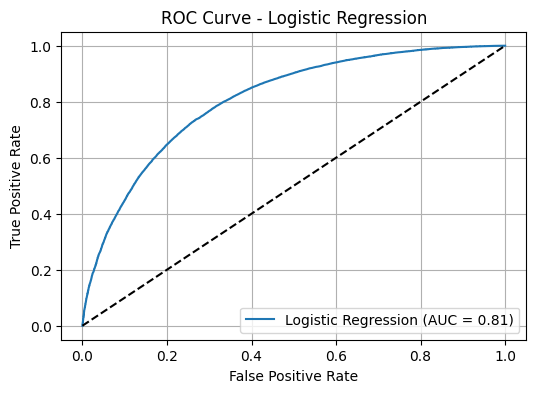

In [259]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

# Evaluation
print("🔹 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_lr))

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_score(y_test, y_prob_lr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [260]:
!pip install streamlit


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [263]:

pip install joblib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [264]:
from lightgbm import LGBMClassifier

# Example training
lgbm = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 144349, number of negative: 99675
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4843
[LightGBM] [Info] Number of data points in the train set: 244024, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


LGBMClassifier(class_weight='balanced', random_state=42)

In [266]:
import joblib

# Assuming lgbm is your trained LightGBM model
joblib.dump(lgbm, 'loan_default_model.pkl')



['loan_default_model.pkl']

In [267]:
model = joblib.load('loan_default_model.pkl')



In [268]:
pip install streamlit joblib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas numpy xgboost


Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-2.1.4-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   - -------------------------------------- 5.5/124.9 MB 30.5 MB/s eta 0:00:04
   ---- ----------------------------------- 14.4/124.9 MB 37.7 MB/s eta 0:00:03
   ----- ---------------------------------- 18.6/124.9 MB 30.9 MB/s eta 0:00:04
   ------ --------------------------------- 19.7/124.9 MB 23.9 MB/s eta 0:00:05
   ------ --------------------------------- 21.0/124.9 MB 20.1 MB/s eta 0:00:06
   ------ --------------------------------- 21.0/124.9 MB 20.1 MB/s eta 0:00:06
   ------- -------------------------------- 22.0/124.9 MB 16.6 MB/s eta 0:00:07
   ------- -------------------------------- 23.1/124.9 MB 15.1 MB/s eta 0:00:07
   ------- -------------------------------- 24.1/124.9 MB 13.9 MB/s eta 0:00:08
   -------- ------------------------------- 25.2/124.9 MB 12.9

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\khush\\AppData\\Roaming\\Python\\Python39\\site-packages\\xgboost\\lib\\xgboost.dll'
Check the permissions.



In [1]:
pip install -r requirements.txt


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import joblib
from sklearn.preprocessing import PolynomialFeatures

# Load your training data
df = pd.read_csv('Loan_default.csv')

# Select the 5 input features using the correct column names
X = df[['Income', 'InterestRate', 'LoanAmount', 'Age', 'CreditScore']]

# Fit PolynomialFeatures with degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Save the fitted transformer to a .pkl file
joblib.dump(poly, 'poly_transformer.pkl')
print("✅ New poly_transformer.pkl saved with corrected feature names.")


✅ New poly_transformer.pkl saved with corrected feature names.


In [17]:
import pandas as pd

df = pd.read_csv('Loan_default.csv')
print(df.columns.tolist())



['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default']


In [20]:
features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed']

X = df[features]
y = df['Default']  # or your target column


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)



LogisticRegression(max_iter=1000, random_state=42)

In [22]:
import joblib

joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(lr_model, 'lr_model.pkl')


['lr_model.pkl']

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib

# Load your dataset
df = pd.read_csv('Loan_default.csv')

# Define features and target
features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed']
X = df[features]
y = df['Default']  # Adjust if your target column name is different

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} Evaluation ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("\n")

# Evaluate both models
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, lr_pred, "Logistic Regression")

# Save models
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(lr_model, 'lr_model.pkl')


--- Random Forest Evaluation ---
Accuracy: 0.884354807127472
Precision: 0.49493243243243246
Recall: 0.049661016949152544
F1 Score: 0.09026494146642021
Confusion Matrix:
 [[44871   299]
 [ 5607   293]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     45170
           1       0.49      0.05      0.09      5900

    accuracy                           0.88     51070
   macro avg       0.69      0.52      0.51     51070
weighted avg       0.84      0.88      0.84     51070



--- Logistic Regression Evaluation ---
Accuracy: 0.884452711963971
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[45169     1]
 [ 5900     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     45170
           1       0.00      0.00      0.00      5900

    accuracy                           0.88     51070
   macro avg       0.44      0.50      0.47 

['lr_model.pkl']

In [25]:
pip install streamlit numpy joblib matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install shap


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/544.8 kB ? eta -:--:--
   ---------------------------------------- 544.8/544.8 kB 6.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --------------- ------------------------ 1.0/2.7 MB 49.2 MB/s eta 0:00:01
   ----------------------------------- ---- 2.4/2.7 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   - -------------------------------------- 1.0/28.1 MB 25.4 MB/s eta 0:00:02
   -- ------------------------------------- 2.1/28.1 MB 7.8 MB/s eta 0:00:04
   ---- ----------------------------------- 3.1/28.1 MB 4.9 MB/s eta 0:00:06
   ----- ---------------------------------- 4.2/28.1 MB 4.9 MB/s eta 0:00:05
   ------- -----------------

In [ ]:
pip install streamlit-lottie


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


: 